In [1]:
import numpy as np

from src.data import generate_periodic_function
from src.plotting import plot_2d_function
from src.RBF_network import RBFNetwork
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
import seaborn as sns

img_path = 'img/'

# First part of the assignment of ANNDA lab 2
## 3.1 Batch mode training using least squares - supervised learning of network weights

In this simple assignment, you should focus on supervised learning of weights
of the RBF network built to address a simple regression problem. Please implement rst batch learning from scratch without using dedicated NN toolboxes.
The two function to approximare are sin(2x) and square(2x) (square is a rectangular curve serving as a "box" envelope for the sine wave, i.e. it is 1 for
arguments where the sin>=0 and -1 otherwise). Note that the input space is
R, so each pattern x1, x2, . . . , xN in (6) is in fact a scalar. Begin by creating
a column vector containing the points (patterns) where you want to evaluate
your function. Let's limit the regression to the interval [0, 2π]. Sample this
interval starting from 0 with the step size of 0.1 and calculate the values of
the two functions at the these points to obtain the corresponding training sets.
The testing sets could be generated analogously with sampling starting from
0.05 and the same step size.

In [2]:
sin_df = generate_periodic_function(function='sin')
square_df = generate_periodic_function(function= 'square')

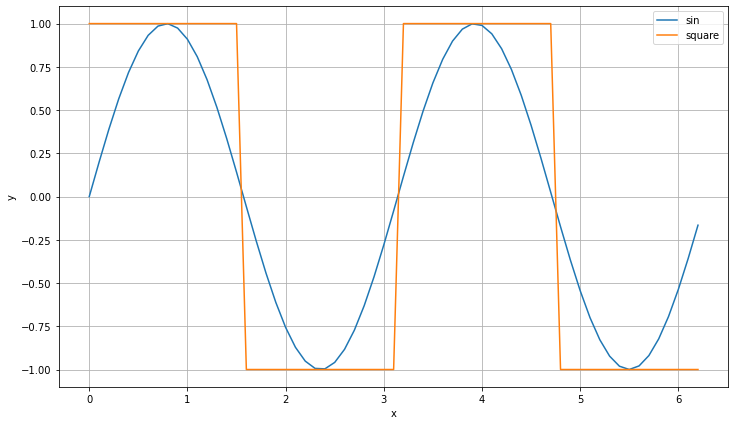

In [3]:
plot_2d_function(
    dfs=[sin_df, square_df],
    function_names=['sin', 'square'],
    path=img_path + 'periodic_functions'
)

For a varying number of RBF nodes, please place them by hand in the input space according to your judgement, and set the
same variance to each node.

In [4]:
rbf_locations = np.asarray([np.pi * k/4 for k in range(9) if k%2 != 0]).reshape((4, 1))
rbf_scale = 0.5

Next, apply your batch learning algorithm on your
training set to adjust the output weights and test accordingly on the hold-out
set.

In [5]:
rbf_network = RBFNetwork(
    rbf_locations=rbf_locations,
    rbf_scale=rbf_scale,
    learning_rule='least_squares'
)

rbf_network.fit(sin_df[['x']].to_numpy(), sin_df[['y']].to_numpy())

In [6]:
error = cross_val_score(
            estimator = rbf_network,
            X = sin_df[['x']].to_numpy(),
            y = sin_df[['y']].to_numpy(),
            scoring = 'neg_mean_absolute_error',
        )

print(
    'The MAE on the hold-out set with a first educate guess is {} with std {}.'.format(
        -error.mean(), 
        error.std()
    )
)

The MAE on the hold-out set with a first educate guess is 0.039774741184006514 with std 0.028630045277796046.


In [7]:
rbf_locations = np.asarray([np.pi * k/4 for k in range(9) if k%2 != 0]).reshape((4, 1))
rbf_scale = 0.9

In [8]:
rbf_network = RBFNetwork(
    rbf_locations=rbf_locations,
    rbf_scale=rbf_scale,
    learning_rule='least_squares'
)

rbf_network.fit(square_df[['x']].to_numpy(), square_df[['y']].to_numpy())

In [9]:
error = cross_val_score(
            estimator = rbf_network,
            X = square_df[['x']].to_numpy(),
            y = square_df[['y']].to_numpy(),
            scoring = 'neg_mean_absolute_error',
            cv=10
        )

print(
    'The MAE on the hold-out set with a first educate guess is {} with std {}.'.format(
        -error.mean(), 
        error.std()
    )
)

The MAE on the hold-out set with a first educate guess is 0.3659668008457944 with std 0.18700144706214938.


For both functions (studied indepenedently), please consider and discuss the
following issues (which involve running the suggested experiments):

 Try to vary the number of units to obtain the absolute residual error
below 0.1, 0.01 and 0.001 in the residual value (absolute residual error is
understood as the average absolute difference between the network outputs
and the desirable target values). Please discuss the results, how many units
are needed for the aforementioned error thresholds?

### Sin function

In [10]:
vectors = [
    np.asarray([np.pi]).reshape((1, 1)),
    np.asarray([3*np.pi/4, 5*np.pi/4]).reshape((2, 1)),
    np.asarray([3*np.pi/4, np.pi, 5*np.pi/4]).reshape((3, 1)),
    np.asarray([np.pi * k/4 for k in range(8) if k%2 != 0]).reshape((4, 1)),
    np.asarray([np.pi/4, 3*np.pi/4, np.pi, 5*np.pi/4, 7*np.pi/4]).reshape((5, 1)),
    np.asarray([np.pi/4, np.pi/2, 3*np.pi/4, np.pi, 5*np.pi/4, 7*np.pi/4]).reshape((6, 1)),
    np.asarray([np.pi/4, np.pi/2, 3*np.pi/4, np.pi, 5*np.pi/4, 3*np.pi/2, 7*np.pi/4]).reshape((7, 1)),
    np.asarray([0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi, 5*np.pi/4, 3*np.pi/2, 7*np.pi/4]).reshape((8, 1))
]

In [11]:
results = {
    'models' : [],
    'mae' : [],
    'std' : [],
    'num_nodes' : []
}

for rbf_locations in vectors:
    rbf_network = RBFNetwork(
        rbf_locations= rbf_locations,
        rbf_scale=2,
        learning_rule='least_squares'
    )
    
    rbf_network.fit(
        X = sin_df[['x']].to_numpy(),
        y = sin_df[['y']].to_numpy()
    )
    
    error = -cross_val_score(
            estimator = rbf_network,
            X = sin_df[['x']].to_numpy(),
            y = sin_df[['y']].to_numpy(),
            scoring = 'neg_mean_absolute_error',
            cv=10
        )
    
    num_nodes = len(rbf_locations)
    
    print('The generalization error with {} nodes is {} with std {}'.format(num_nodes,error.mean(), error.std()))
    print('The train error is {}'.format(
        mean_absolute_error(
            sin_df[['y']].to_numpy(),
            rbf_network.predict(sin_df[['x']].to_numpy())
        )
    )
         )
    
    results['models'].append(rbf_network)
    results['mae'].append(error.mean())
    results['std'].append(error.std())
    results['num_nodes'].append(num_nodes)

The generalization error with 1 nodes is 0.7009552072437598 with std 0.2702511773749914
The train error is 0.6347988916411252
The generalization error with 2 nodes is 0.746520673881672 with std 0.33077031325391887
The train error is 0.6061217891009396
The generalization error with 3 nodes is 0.8343752091584408 with std 0.34000470976112523
The train error is 0.6060317565478408
The generalization error with 4 nodes is 0.7395775624183508 with std 0.33191663676547395
The train error is 0.44547605724975686
The generalization error with 5 nodes is 1.0737812040827344 with std 0.8388271511619082
The train error is 0.4438094185235579
The generalization error with 6 nodes is 0.19396596686743472 with std 0.19228818553302923
The train error is 0.07541079247548303
The generalization error with 7 nodes is 0.23472461539026562 with std 0.29753936407730774
The train error is 0.05964484912115199
The generalization error with 8 nodes is 0.05071359188191704 with std 0.07512820318189119
The train error is 

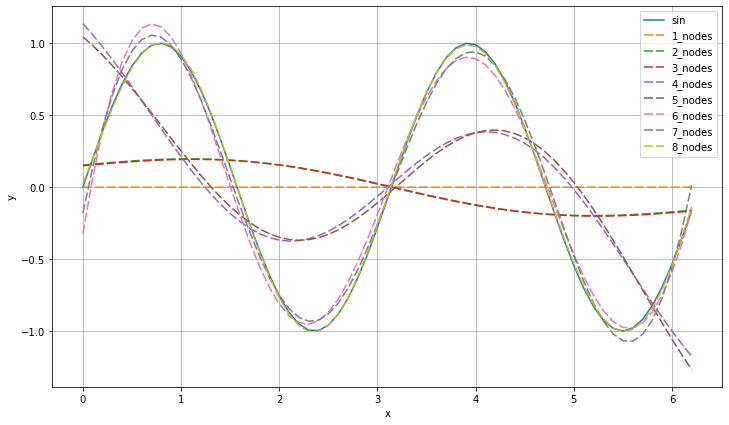

In [12]:
plot_2d_function(
    dfs=[sin_df],
    function_names=['sin'],
    models = results['models'],
    names = ['{}_nodes'.format(num_nodes) for num_nodes in results['num_nodes']],
    path=img_path + 'sin_interpolation'
)

### Square function

In [13]:
vectors = [
    np.asarray([3*np.pi/4]).reshape((1, 1)),
    np.asarray([3*np.pi/4, 5*np.pi/4]).reshape((2, 1)),
    np.asarray([0, 3*np.pi/4, 5*np.pi/4]).reshape((3, 1)),
    np.asarray([0, 3*np.pi/4, 5*np.pi/4, 2*np.pi]).reshape((4, 1)),
    np.asarray([0, 3*np.pi/4, 5*np.pi/4, 7*np.pi/4, 2*np.pi]).reshape((5, 1)),
    np.asarray([0, np.pi/4, 3*np.pi/4, 5*np.pi/4, 7*np.pi/4, 2*np.pi]).reshape((6, 1)),
    np.asarray([0, np.pi/4, 3*np.pi/4, np.pi, 5*np.pi/4, 7*np.pi/4,  2*np.pi]).reshape((7, 1)),
    np.asarray([0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi, 5*np.pi/4, 3*np.pi/2, 7*np.pi/4]).reshape((8, 1)),
    np.random.choice(square_df[['x']].to_numpy().flatten(), size=(50, 1), replace=False)
]

In [14]:
results = {
    'models' : [],
    'mae' : [],
    'std' : [],
    'num_nodes' : []
}

for rbf_locations in vectors:
    rbf_network = RBFNetwork(
        rbf_locations= rbf_locations,
        rbf_scale=5,
        learning_rule='least_squares'
    )
    
    rbf_network.fit(
        X = square_df[['x']].to_numpy(),
        y = square_df[['y']].to_numpy()
    )
    
    error = -cross_val_score(
            estimator = rbf_network,
            X = square_df[['x']].to_numpy(),
            y = square_df[['y']].to_numpy(),
            scoring = 'neg_mean_absolute_error',
            cv=10
        )
    
    num_nodes = len(rbf_locations)
    
    print('The generalization error with {} nodes is {} with std {}'.format(num_nodes,error.mean(), error.std()))
    print('The train error is {}'.format(
        mean_absolute_error(
            square_df[['y']].to_numpy(),
            rbf_network.predict(square_df[['x']].to_numpy())
        )
    )
         )
    
    results['models'].append(rbf_network)
    results['mae'].append(error.mean())
    results['std'].append(error.std())
    results['num_nodes'].append(num_nodes)

The generalization error with 1 nodes is 1.0829350122442416 with std 0.04144597992976221
The train error is 0.9987515176930757
The generalization error with 2 nodes is 0.9901005297054868 with std 0.30434951460181403
The train error is 0.8452284596611094
The generalization error with 3 nodes is 1.1168856844763353 with std 0.2743226696816994
The train error is 0.8429825658888198
The generalization error with 4 nodes is 1.1296566358520632 with std 0.2851184143675861
The train error is 0.7088402766973833
The generalization error with 5 nodes is 1.723631378719448 with std 1.281463347039719
The train error is 0.7081351333631303
The generalization error with 6 nodes is 0.5827836129282202 with std 0.3656135161042654
The train error is 0.39430524585149546
The generalization error with 7 nodes is 0.6736580649941711 with std 0.4562445289700252
The train error is 0.39651116698847283
The generalization error with 8 nodes is 0.6146163045920686 with std 0.3706008645014852
The train error is 0.3983235

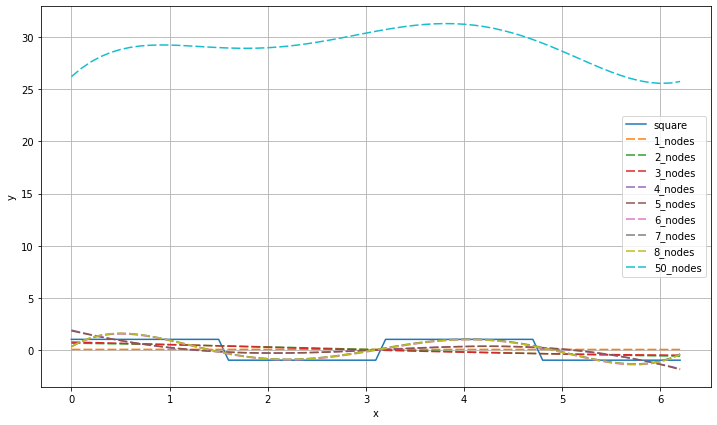

In [15]:
plot_2d_function(
    dfs=[square_df],
    function_names=['square'],
    models = results['models'],
    names = ['{}_nodes'.format(num_nodes) for num_nodes in results['num_nodes']],
    path=img_path + 'square_interpolation'
)

How can you simply transform the output of your RBF network to reduce the residual error to 0 for the square(2x) problem? Still, how many
units do you need? In what type of applications could this transform be
particularly useful?

In [16]:
rbf_network = RBFNetwork(
    rbf_locations= square_df[['x']],
    rbf_scale=0.01,
    learning_rule='least_squares'
)

rbf_network.fit(
    X = square_df[['x']].to_numpy(),
    y = square_df[['y']].to_numpy()
)

error = mean_absolute_error(
    y_true = square_df[['y']].to_numpy().flatten(),
    y_pred = rbf_network.predict(sin_df[['x']].to_numpy()).flatten()
)

print('The error with {} nodes is {}'.format(len(square_df['x']),error.mean()))

The error with 63 nodes is 0.0


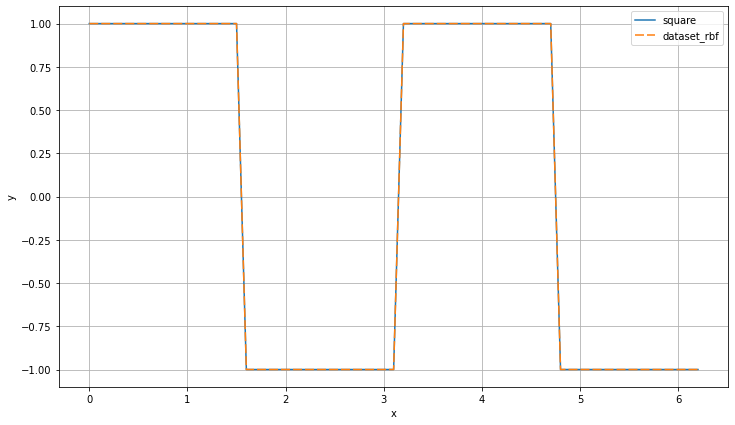

In [17]:
plot_2d_function(
    dfs=[square_df],
    function_names=['square'],
    models = [rbf_network],
    names = ['dataset_rbf'],
    path=img_path + 'square_perfect_interpolation'
)

## 3.2 Regression with noise

Please add zero-mean Gaussian noise with the variance of 0.1 to both training
and testing datasets for the same functions as in section 3.1. You are also
requested to implement an algorithm for on-line learning with delta rule and
compare it with batch learning developed in section 3.1 (given that the data
points are randomly shuffled in each epoch). As before, please place the RBF
units by hand wherever you consider suitable and fix the same width for them.
Vary the number of RBF nodes within reasonable limits and try five different
widths of the RBF kernel to investigate the effect of these two parameters on
points and make the requsted analyses:

In [18]:
sin_df = generate_periodic_function(function='sin', noise=True)
square_df = generate_periodic_function(function= 'square', noise=True)

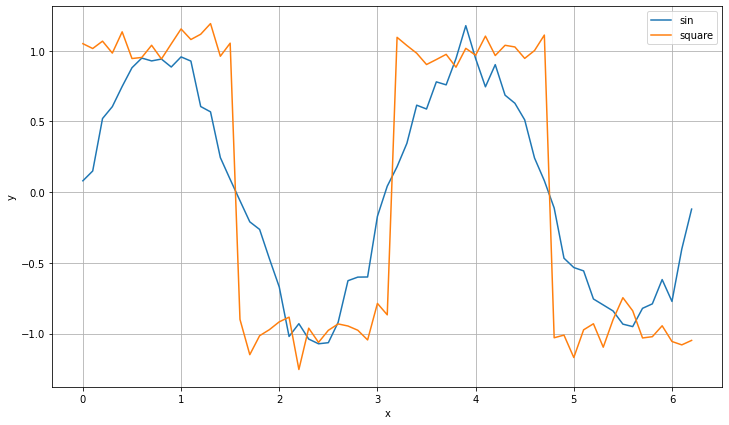

In [19]:
plot_2d_function(
    dfs=[sin_df, square_df],
    function_names=['sin', 'square'],
    path=img_path + 'noisy_periodic_functions'
)

Compare the effect of the number of RBF units and their width for the
two learning approaches. Which error estimate should you choose as the
criterion for these comparative analyses?

### Sin function

In [20]:
vectors = [
    np.asarray([np.pi]).reshape((1, 1)),
    np.asarray([3*np.pi/4, 5*np.pi/4]).reshape((2, 1)),
    np.asarray([3*np.pi/4, np.pi, 5*np.pi/4]).reshape((3, 1)),
    np.asarray([np.pi * k/4 for k in range(8) if k%2 != 0]).reshape((4, 1)),
    np.asarray([np.pi/4, 3*np.pi/4, np.pi, 5*np.pi/4, 7*np.pi/4]).reshape((5, 1)),
    np.asarray([np.pi/4, np.pi/2, 3*np.pi/4, np.pi, 5*np.pi/4, 7*np.pi/4]).reshape((6, 1)),
    np.asarray([np.pi/4, np.pi/2, 3*np.pi/4, np.pi, 5*np.pi/4, 3*np.pi/2, 7*np.pi/4]).reshape((7, 1)),
    np.asarray([0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi, 5*np.pi/4, 3*np.pi/2, 7*np.pi/4]).reshape((8, 1))
]

In [21]:
for rbf_locations in vectors:
    rbf_network = RBFNetwork(
        rbf_locations= rbf_locations,
        rbf_scale=0.5,
        learning_rule='least_squares'
    )

    rbf_network.fit(
        X = sin_df[['x']].to_numpy(),
        y = sin_df[['y']].to_numpy()
    )

    error = -cross_val_score(
            estimator = rbf_network,
            X = sin_df[['x']].to_numpy(),
            y = sin_df[['y']].to_numpy(),
            scoring = 'neg_mean_absolute_error',
            cv=10
        )

    num_nodes = len(rbf_locations)

    print('The generalization error of least squares with {} nodes is {} with std {}'.format(num_nodes, error.mean(), error.std()))
    print('The train error is {}'.format(
        mean_absolute_error(
            sin_df[['y']].to_numpy(),
            rbf_network.predict(sin_df[['x']].to_numpy())
            )
        )
    )
    
    rbf_network = RBFNetwork(
        rbf_locations= rbf_locations,
        rbf_scale=0.5,
        learning_rule='delta_online',
        max_iterations=1000
    )

    rbf_network.fit(
        X = sin_df[['x']].to_numpy(),
        y = sin_df[['y']].to_numpy()
    )

    error = -cross_val_score(
            estimator = rbf_network,
            X = sin_df[['x']].to_numpy(),
            y = sin_df[['y']].to_numpy(),
            scoring = 'neg_mean_absolute_error',
            cv=10
        )
    
    print('The generalization error of delta online with {} nodes is {} with std {}'.format(num_nodes, error.mean(), error.std()))
    print('The train error is {}'.format(
        mean_absolute_error(
            sin_df[['y']].to_numpy(),
            rbf_network.predict(sin_df[['x']].to_numpy())
            )
        )
    )       

The generalization error of least squares with 1 nodes is 0.6955055784089219 with std 0.24956236546242128
The train error is 0.6254853976425734
The generalization error of delta online with 1 nodes is 0.6927365751356607 with std 0.24962146747446293
The train error is 0.6254036339039796
The generalization error of least squares with 2 nodes is 0.40771290325373943 with std 0.27674483992569343
The train error is 0.3867292627958537
The generalization error of delta online with 2 nodes is 0.41130249335219543 with std 0.27581881771733574
The train error is 0.3867607446557654
The generalization error of least squares with 3 nodes is 0.4150621315696208 with std 0.27310429672555164
The train error is 0.38548404145889975
The generalization error of delta online with 3 nodes is 0.42382395841399373 with std 0.26999396680685717
The train error is 0.38476753349649023
The generalization error of least squares with 4 nodes is 0.08654629658976284 with std 0.032222855799399173
The train error is 0.07531

In [22]:
results = {
    'ls_models' : [],
    'delta_models' : []
}

for width in [0.1, 0.5, 1, 2, 5]:
    rbf_network = RBFNetwork(
        rbf_locations= vectors[7],
        rbf_scale=width,
        learning_rule='least_squares'
    )

    rbf_network.fit(
        X = sin_df[['x']].to_numpy(),
        y = sin_df[['y']].to_numpy()
    )

    error = -cross_val_score(
            estimator = rbf_network,
            X = sin_df[['x']].to_numpy(),
            y = sin_df[['y']].to_numpy(),
            scoring = 'neg_mean_absolute_error',
            cv=10
        )

    num_nodes = len(rbf_locations)

    print('The generalization error of least squares with {} width is {} with std {}'.format(width, error.mean(), error.std()))
    print('The train error is {}'.format(
        mean_absolute_error(
            sin_df[['y']].to_numpy(),
            rbf_network.predict(sin_df[['x']].to_numpy())
            )
        )
    )
    
    results['ls_models'].append(rbf_network)
    
    rbf_network = RBFNetwork(
        rbf_locations= vectors[7],
        rbf_scale=width,
        learning_rule='delta_online',
        max_iterations=1000
    )

    rbf_network.fit(
        X = sin_df[['x']].to_numpy(),
        y = sin_df[['y']].to_numpy()
    )

    error = -cross_val_score(
            estimator = rbf_network,
            X = sin_df[['x']].to_numpy(),
            y = sin_df[['y']].to_numpy(),
            scoring = 'neg_mean_absolute_error',
            cv=10
        )
    
    print('The generalization error of delta online with {} width is {} with std {}'.format(width, error.mean(), error.std()))
    print('The train error is {}'.format(
        mean_absolute_error(
            sin_df[['y']].to_numpy(),
            rbf_network.predict(sin_df[['x']].to_numpy())
            )
        )
    )       
    
    results['delta_models'].append(rbf_network)
    

The generalization error of least squares with 0.1 width is 113768459.6168451 with std 341305324.2304586
The train error is 0.45270358439046154
The generalization error of delta online with 0.1 width is 0.6920371786820054 with std 0.2403582467367299
The train error is 0.4725757099312248
The generalization error of least squares with 0.5 width is 0.09305306787159373 with std 0.02863515735243053
The train error is 0.07311335561820514
The generalization error of delta online with 0.5 width is 0.16018234826260563 with std 0.08972408965724542
The train error is 0.07420623717825174
The generalization error of least squares with 1 width is 0.16808810521497722 with std 0.10865174579182345
The train error is 0.07994940828480732
The generalization error of delta online with 1 width is 0.409564818439007 with std 0.21895478945343666
The train error is 0.23427630517739068
The generalization error of least squares with 2 width is 0.10504120337653296 with std 0.05377831900183628
The train error is 0.

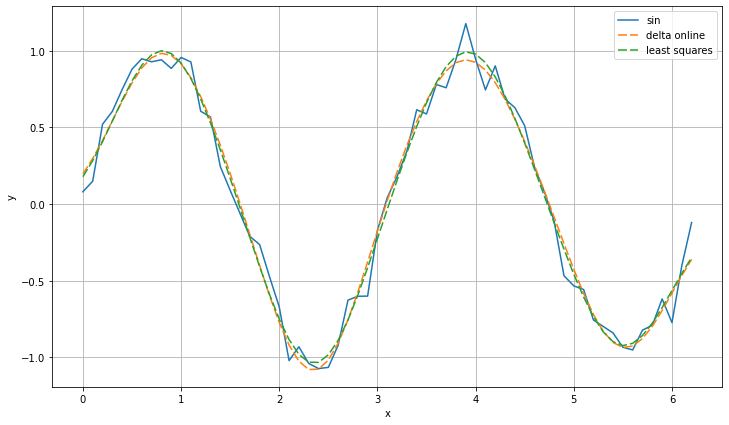

In [23]:
plot_2d_function(
    dfs=[sin_df],
    function_names=['sin'],
    models = [results['delta_models'][1], results['ls_models'][1]],
    names = ['delta online', 'least squares'],
    path=img_path + 'sin_delta_vs_ls'
)

### Square function

In [24]:
vectors = [
    np.asarray([3*np.pi/4]).reshape((1, 1)),
    np.asarray([3*np.pi/4, 5*np.pi/4]).reshape((2, 1)),
    np.asarray([0, 3*np.pi/4, 5*np.pi/4]).reshape((3, 1)),
    np.asarray([0, 3*np.pi/4, 5*np.pi/4, 2*np.pi]).reshape((4, 1)),
    np.asarray([0, 3*np.pi/4, 5*np.pi/4, 7*np.pi/4, 2*np.pi]).reshape((5, 1)),
    np.asarray([0, np.pi/4, 3*np.pi/4, 5*np.pi/4, 7*np.pi/4, 2*np.pi]).reshape((6, 1)),
    np.asarray([0, np.pi/4, 3*np.pi/4, np.pi, 5*np.pi/4, 7*np.pi/4,  2*np.pi]).reshape((7, 1)),
    np.asarray([0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi, 5*np.pi/4, 3*np.pi/2, 7*np.pi/4]).reshape((8, 1)),
    np.random.choice(square_df[['x']].to_numpy().flatten(), size=(50, 1), replace=False)
]

In [25]:
for rbf_locations in vectors:
    rbf_network = RBFNetwork(
        rbf_locations= rbf_locations,
        rbf_scale=0.5,
        learning_rule='least_squares'
    )

    rbf_network.fit(
        X = square_df[['x']].to_numpy(),
        y = square_df[['y']].to_numpy()
    )

    error = -cross_val_score(
            estimator = rbf_network,
            X = square_df[['x']].to_numpy(),
            y = square_df[['y']].to_numpy(),
            scoring = 'neg_mean_absolute_error',
            cv=10
        )

    num_nodes = len(rbf_locations)

    print('The generalization error of least squares with {} nodes is {} with std {}'.format(num_nodes, error.mean(), error.std()))
    print('The train error is {}'.format(
        mean_absolute_error(
            square_df[['y']].to_numpy(),
            rbf_network.predict(square_df[['x']].to_numpy())
            )
        )
    )
    
    rbf_network = RBFNetwork(
        rbf_locations= rbf_locations,
        rbf_scale=0.5,
        learning_rule='delta_online',
        max_iterations=1000
    )

    rbf_network.fit(
        X = square_df[['x']].to_numpy(),
        y = square_df[['y']].to_numpy()
    )

    error = -cross_val_score(
            estimator = rbf_network,
            X = square_df[['x']].to_numpy(),
            y = square_df[['y']].to_numpy(),
            scoring = 'neg_mean_absolute_error',
            cv=10
        )
    
    print('The generalization error of delta online with {} nodes is {} with std {}'.format(num_nodes, error.mean(), error.std()))
    print('The train error is {}'.format(
        mean_absolute_error(
            square_df[['y']].to_numpy(),
            rbf_network.predict(square_df[['x']].to_numpy())
            )
        )
    )       

The generalization error of least squares with 1 nodes is 0.8474527680552788 with std 0.30922106612106265
The train error is 0.8449598602470355
The generalization error of delta online with 1 nodes is 0.8462901712667463 with std 0.31218855057009876
The train error is 0.8449621478337386
The generalization error of least squares with 2 nodes is 0.688701793138722 with std 0.34540955855048616
The train error is 0.6812427330780394
The generalization error of delta online with 2 nodes is 0.6847013066170644 with std 0.3508856122308112
The train error is 0.68122093207245
The generalization error of least squares with 3 nodes is 0.8145658989810884 with std 0.6315085823699289
The train error is 0.567083184758075
The generalization error of delta online with 3 nodes is 0.579134324777964 with std 0.334784531841458
The train error is 0.5669204487673549
The generalization error of least squares with 4 nodes is 0.8592486764975558 with std 0.6914050306046537
The train error is 0.4621494650646514
The g

In [ ]:
results = {
    'ls_models' : [],
    'delta_models' : []
}

for width in [0.1, 0.5, 1, 2, 5]:
    rbf_network = RBFNetwork(
        rbf_locations= vectors[6],
        rbf_scale=width,
        learning_rule='least_squares'
    )

    rbf_network.fit(
        X = square_df[['x']].to_numpy(),
        y = square_df[['y']].to_numpy()
    )

    error = -cross_val_score(
            estimator = rbf_network,
            X = square_df[['x']].to_numpy(),
            y = square_df[['y']].to_numpy(),
            scoring = 'neg_mean_absolute_error',
            cv=10
        )

    num_nodes = len(rbf_locations)

    print('The generalization error of least squares with {} width is {} with std {}'.format(width, error.mean(), error.std()))
    print('The train error is {}'.format(
        mean_absolute_error(
            square_df[['y']].to_numpy(),
            rbf_network.predict(square_df[['x']].to_numpy())
            )
        )
    )
    
    results['ls_models'].append(rbf_network)
    
    rbf_network = RBFNetwork(
        rbf_locations= vectors[6],
        rbf_scale=width,
        learning_rule='delta_online',
        max_iterations=1000
    )

    rbf_network.fit(
        X = square_df[['x']].to_numpy(),
        y = square_df[['y']].to_numpy()
    )

    error = -cross_val_score(
            estimator = rbf_network,
            X = square_df[['x']].to_numpy(),
            y = square_df[['y']].to_numpy(),
            scoring = 'neg_mean_absolute_error',
            cv=10
        )
    
    print('The generalization error of delta online with {} width is {} with std {}'.format(width, error.mean(), error.std()))
    print('The train error is {}'.format(
        mean_absolute_error(
            square_df[['y']].to_numpy(),
            rbf_network.predict(square_df[['x']].to_numpy())
            )
        )
    )       
    
    results['delta_models'].append(rbf_network)
    

The generalization error of least squares with 0.1 width is 215718270.32527676 with std 514638601.22812724
The train error is 0.7996444430306676
The generalization error of delta online with 0.1 width is 1.1154984785227409 with std 0.3292147203978176
The train error is 0.8024012213844006
The generalization error of least squares with 0.5 width is 0.7257067182473477 with std 0.5360287429416983
The train error is 0.32703390507408736


In [ ]:
plot_2d_function(
    dfs=[square_df],
    function_names=['square'],
    models = [results['delta_models'][1], results['ls_models'][1]],
    names = ['delta online', 'least squares'],
    path=img_path + 'square_delta_vs_ls'
)

 How important is the positioning of the RBF nodes in the input space?
What strategy did you choose? Is it better than random positioning of the
RBF nodes? Please support your conclusions with quantitative evidence
(e.g., error comparison)

Take the sin function and compare the strategy of positioning in maxima and minima vs random

In [ ]:
rbf_network = RBFNetwork(
    rbf_locations= np.asarray([np.pi * k/4 for k in range(8) if k%2 != 0]).reshape((4, 1)),
    rbf_scale=0.5,
    learning_rule='least_squares'
)

rbf_network.fit(
    X = sin_df[['x']].to_numpy(),
    y = sin_df[['y']].to_numpy()
)

error = -cross_val_score(
        estimator = rbf_network,
        X = sin_df[['x']].to_numpy(),
        y = sin_df[['y']].to_numpy(),
        scoring = 'neg_mean_absolute_error',
        cv=10
    )

print('The generalization error with an intentional strategy is {} with std {}'.format(error.mean(), error.std()))
print('The train error is {}'.format(
        mean_absolute_error(
            sin_df[['y']].to_numpy(),
            rbf_network.predict(sin_df[['x']].to_numpy())
        )
    )
)

intentional_network = rbf_network

In [ ]:
rbf_network = RBFNetwork(
    rbf_locations= np.random.uniform(0, 2*np.pi, (4, 1)),
    rbf_scale=0.5,
    learning_rule='least_squares'
)

rbf_network.fit(
    X = sin_df[['x']].to_numpy(),
    y = sin_df[['y']].to_numpy()
)

error = -cross_val_score(
        estimator = rbf_network,
        X = sin_df[['x']].to_numpy(),
        y = sin_df[['y']].to_numpy(),
        scoring = 'neg_mean_absolute_error',
        cv=10
    )

print('The generalization error with a random strategy is {} with std {}'.format(error.mean(), error.std()))
print('The train error is {}'.format(
        mean_absolute_error(
            sin_df[['y']].to_numpy(),
            rbf_network.predict(sin_df[['x']].to_numpy())
        )
    )
)

random_network = rbf_network

In [ ]:
plot_2d_function(
    dfs=[sin_df],
    function_names=['sin'],
    models = [intentional_network, random_network],
    names = ['custom strategy', 'random positioning'],
    path=img_path + 'sin_strategy_vs_random_noisy'
)

 Also, for the same network models estimate their test performance on the
original clean data used in section 3.1 (a corresponding test subset but
without noise) and compare your findings.


In [ ]:
non_noisy_sin_df = generate_periodic_function(function='sin')

In [ ]:
print('The error of the custom strategy without noise is {}'.format(
    mean_absolute_error(
        non_noisy_sin_df[['y']].to_numpy(),
        intentional_network.predict(non_noisy_sin_df[['x']].to_numpy())
        )
    )
)

In [ ]:
print('The error of the random strategy without noise is {}'.format(
    mean_absolute_error(
        non_noisy_sin_df[['y']].to_numpy(),
        random_network.predict(non_noisy_sin_df[['x']].to_numpy())
        )
    )
)

In [ ]:
plot_2d_function(
    dfs=[non_noisy_sin_df],
    function_names=['sin'],
    models = [intentional_network, random_network],
    names = ['custom strategy', 'random positioning'],
    path=img_path + 'sin_strategy_vs_random'
)

Please compare your optimal RBF network trained in batch mode with
a single-hidden-layer perceptron trained with backprop (also in batch
mode), which you implemented in the first lab assignment. Please use
the same number of hidden units as in the RBF network. The comparison
should be made for both functions: sin(2x) and square(2x), only for the
noisy case. Please remember that generalisation performance and training
time are of greatest interest

 ### Sin function

#### RBF

In [ ]:
rbf_network = RBFNetwork(
    rbf_locations=np.asarray([0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi, 5*np.pi/4, 3*np.pi/2, 7*np.pi/4]).reshape((8, 1)),
    rbf_scale=0.5,
    learning_rule='least_squares',
)

error = -cross_val_score(
        estimator = rbf_network,
        X = sin_df[['x']].to_numpy(),
        y = sin_df[['y']].to_numpy(),
        scoring = 'neg_mean_absolute_error',
        cv=10
    )

rbf_network.fit(
    X = sin_df[['x']].to_numpy(),
    y = sin_df[['y']].to_numpy()
)

print('The MAE is {} with std {}'.format(error.mean(), error.std()))

#### MLP

In [ ]:
mlp = MLPRegressor(
    hidden_layer_sizes=(8),
    activation='logistic',
    alpha=0,
    max_iter=1000
)

error = -cross_val_score(
        estimator = mlp,
        X = sin_df[['x']].to_numpy(),
        y = sin_df['y'].to_numpy(),
        scoring = 'neg_mean_absolute_error',
        cv=10
    )

mlp.fit(
    X = sin_df[['x']].to_numpy(),
    y = sin_df[['y']].to_numpy().flatten()
)

print('The MAE is {} with std {}'.format(error.mean(), error.std()))

In [ ]:
plot_2d_function(
    dfs=[sin_df],
    function_names=['sin'],
    models = [mlp, rbf_network],
    names = ['mlp', 'rbf network'],
    path=img_path + 'sin_mlp_vs_rbf'
)

### Square function

#### RBF

In [ ]:
rbf_network = RBFNetwork(
    rbf_locations=np.asarray([0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi, 5*np.pi/4, 3*np.pi/2, 7*np.pi/4]).reshape((8, 1)),
    rbf_scale=0.5,
    learning_rule='least_squares',
)

error = -cross_val_score(
        estimator = rbf_network,
        X = square_df[['x']].to_numpy(),
        y = square_df[['y']].to_numpy(),
        scoring = 'neg_mean_absolute_error',
        cv=10
    )

rbf_network.fit(
    X = square_df[['x']].to_numpy(),
    y = square_df[['y']].to_numpy()
)

print('The MAE is {} with std {}'.format(error.mean(), error.std()))

#### MLP

In [ ]:
mlp = MLPRegressor(
    hidden_layer_sizes=(8),
    activation='logistic',
    alpha=0,
    max_iter=1000
)

error = -cross_val_score(
        estimator = mlp,
        X = square_df[['x']].to_numpy(),
        y = square_df['y'].to_numpy(),
        scoring = 'neg_mean_absolute_error',
        cv=10
    )

mlp.fit(
    X = square_df[['x']].to_numpy(),
    y = square_df[['y']].to_numpy().flatten()
)

print('The MAE is {} with std {}'.format(error.mean(), error.std()))

In [ ]:
plot_2d_function(
    dfs=[square_df],
    function_names=['sin'],
    models = [mlp, rbf_network],
    names = ['mlp', 'rbf network'],
    path=img_path + 'square_mlp_vs_rbf'
)